# Problem Statement


I have taken anemia predictioin dataset and I am asked to find if a patient has anemia or not.

# Import all the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

# Load the dataset

In [ ]:
dataset = pd.read_csv("/content/output.csv")

In [ ]:
dataset

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


# Data Preprocessing

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [ ]:
dataset.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [ ]:
dataset.columns

Index(['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic'],
      dtype='object')

In [ ]:
dataset["Sex"].unique()

array(['M', 'F', 'F ', 'M '], dtype=object)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.dtypes

,0
Number,int64
Sex,object
%Red Pixel,float64
%Green pixel,float64
%Blue pixel,float64
Hb,float64
Anaemic,object


# Exploratory Data Analysis

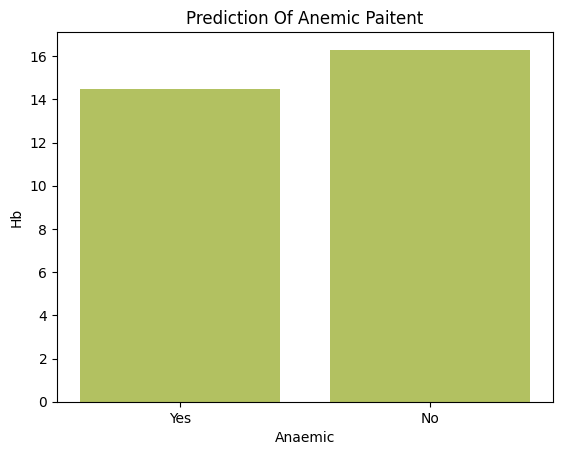

In [ ]:
x = dataset["Anaemic"]
y = dataset["Hb"]
plt.bar(x,y,color = "#b2c161" )
plt.title("Prediction Of Anemic Paitent")
plt.xlabel("Anaemic")
plt.ylabel("Hb")
plt.show()

<Axes: xlabel='Anaemic', ylabel='Hb'>

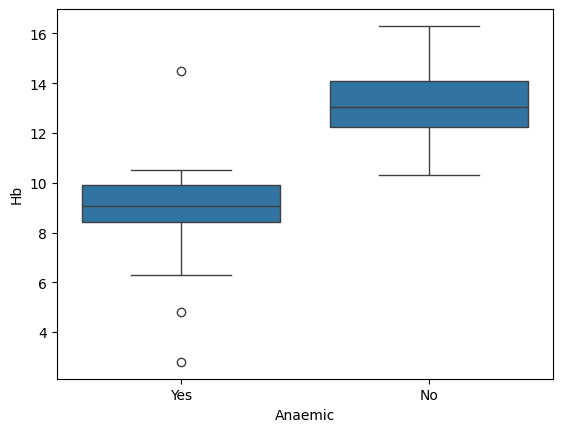

In [ ]:
sns.boxplot(x="Anaemic", y="Hb", data=dataset)

In [ ]:
#sns.pairplot(dataset, palette = "husl", diag_kind = "kde", kind = "reg")

# Label Encoder

In [ ]:
le = LabelEncoder()

In [ ]:
# Identify columns with dtype 'object'
object_columns = dataset.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each object column
for col in object_columns:
    dataset[col] = le.fit_transform(dataset[col])

In [ ]:
dataset.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,2,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,1,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,3,43.2870,30.6972,26.0158,12.4,0


# train_test_split

In [ ]:
X = dataset.iloc[:,[0,1,2,3,4]]
y = dataset.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state = 0)

In [ ]:
model = StandardScaler()
X_train = model.fit_transform(X_train) # fit --> to make the model understand we use fit
X_test = model.transform(X_test)

# Model implementation

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0])

# confusion matrix

In [ ]:
cm = confusion_matrix(y_pred, y_test)

In [ ]:
cm

array([[18,  6],
       [ 0,  2]])

# Accuracy

In [ ]:
accuracy = accuracy_score(y_pred, y_test)

In [ ]:
accuracy * 100

76.92307692307693

# Classification Report

In [ ]:
classification = classification_report(y_pred, y_test, labels = None)

In [ ]:
print(classification)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        24
           1       0.25      1.00      0.40         2

    accuracy                           0.77        26
   macro avg       0.62      0.88      0.63        26
weighted avg       0.94      0.77      0.82        26

